<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/Train_ML_Gausian_Mixture_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import libraries**

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import StratifiedKFold
from sklearn.mixture import GaussianMixture

In [48]:
colors = ['yellow','red','green']
def ellipse(gmm,ax):
  for n, color in enumerate(colors):
    if gmm.covariance_type == 'full':
      covariances = gmm.covariances_[n][:2, :2]
    elif gmm.covariance_type == 'tied':
      covariances = gmm.covariances_[:2, :2]
    elif gmm.covariance_type == 'diag':
      covariances = np.diag(gmm.covariances_[n][:2])
    elif gmm.covariance_type == 'spherical':
      covariances =np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]

    v,w =np.linalg.eigh(covariances) #  v,w=np.linalg.eigh(covariances)
    u= w[0] / np.linalg.norm(w[0])   #  u= w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1],u[0])    #   angle = np.arctan2(u[1],u[0])
    angle= 180 * angle/np.pi         #   angle = 180 * angle/np.pi
    v=2.0 *np.sqrt(2.0) *np.sqrt(v)  #   v = 2.0 *np.sqrt(2.0) *np.sqrt(v)

    ell = mpl.patches.Ellipse(
        gmm.means_[n, :2],v[0] ,v[1] ,angle = 180 + angle,color= color
    )
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.65)
    ax.add_artist(ell)
    ax.set_aspect('equal','datalim')


In [50]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [51]:
skf = StratifiedKFold(n_splits=8,random_state=None)
skf

StratifiedKFold(n_splits=8, random_state=None, shuffle=False)

In [52]:
train_index, test_index = next(iter(skf.split(iris.data,iris.target)))

In [53]:
train_index

array([  7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
       149])

In [54]:
test_index

array([  0,   1,   2,   3,   4,   5,   6,  50,  51,  52,  53,  54,  55,
       100, 101, 102, 103, 104, 105])

In [55]:
x_train = iris.data[train_index]
y_train = iris.target[train_index]
X_test = iris.data[train_index]
Y_test = iris.target[train_index]

# **Here x_train X_test are 2-D array while  y_train Y_Test are 1_D arrays**

In [56]:
x_train

array([[5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2

In [57]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [58]:
X_test

array([[5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.2],
       [5. , 3.2, 1.2, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.6, 1.4, 0.1],
       [4.4, 3. , 1.3, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [4.5, 2

In [59]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [60]:
n_classes = len(np.unique(y_train))
n_classes

3

# **Create GMM Estimators**

In [67]:
estimators = {
    cov_type: GaussianMixture(
        n_components=n_classes,covariance_type=cov_type,random_state=None,max_iter = 25
    )
    for cov_type in ['spherical','diag','tied','full']
}
estimators

{'spherical': GaussianMixture(covariance_type='spherical', max_iter=25, n_components=3),
 'diag': GaussianMixture(covariance_type='diag', max_iter=25, n_components=3),
 'tied': GaussianMixture(covariance_type='tied', max_iter=25, n_components=3),
 'full': GaussianMixture(max_iter=25, n_components=3)}

In [62]:
n_estimators = len(estimators)
n_estimators

4

# **Figure Size**

In [63]:
plt.figure(figsize = (3 * n_estimators // 2, 6))

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

**Adjust Subplots:**

In [64]:
plt.subplots_adjust(
    bottom = 0.02 ,top= 0.98,hspace=0.18 ,wspace=0.05 ,right=0.99,left= 0.022
)

<Figure size 640x480 with 0 Axes>

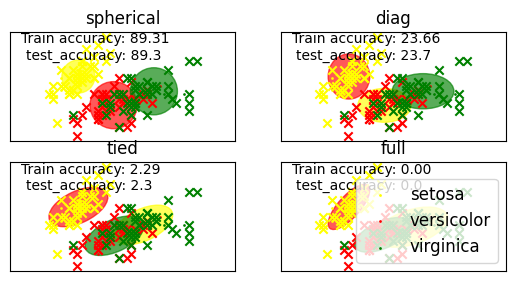

In [69]:
for index,(name,estimator) in enumerate(estimators.items()):

   # since we have class label for train data
   # initilize GMM parameter in supervised manner
  estimator.mean_init = np.array(
      [x_train[y_train == i].mean(axis=0) for i in range(n_classes)]
  )
    # train other parameters using expectation maximization
  estimator.fit(x_train)
  h = plt.subplot(3,n_estimators // 2, index + 1)
  ellipse(estimator,h)

  for n,color in enumerate(colors):
    data = iris.data[iris.target==n]
    plt.scatter(
        data[:, 0],data[:, 1], color =color,s=0.9 ,label=iris.target_names[n]
    )
  for n , color in enumerate(colors):
    data = X_test[Y_test == n]
    plt.scatter(data[:, 0],data[:, 1],marker='x', color=color )

  # train predictions
  y_train_pred= estimator.predict(x_train)
  train_accuracy = np.mean(y_train_pred.ravel() == y_train.ravel()) * 100 # The ravel() function in NumPy is used to flatten a multi-dimensional array into a 1D array
  plt.text(0.05,0.9, "Train accuracy: %.2f" % train_accuracy, transform = h.transAxes)

  # Test predictions
  y_test_pred = estimator.predict(X_test)
  test_accuracy=np.mean(y_test_pred.ravel()== Y_test.ravel()) * 100
  plt.text(0.07,0.75, "test_accuracy: %.1f" % test_accuracy,transform = h.transAxes)


  plt.xticks(())
  plt.yticks(())
  plt.title(name)

plt.legend(scatterpoints=1 , loc='lower right', prop = dict(size=12))
plt.show()